# Unidade 3 Trabalho 1 - Análise de Redes com Processamento de Linguagem Natural

## Alunos:  
- Maria Clara Moura de Freitas (20230093652)
- Poliana Ellen de Araújo (20240001289)

### Bibliotecas

In [1]:
# Instalar o spaCy
!pip install spacy

# !python -m spacy download pt_core_news_lg

# Baixar o modelo de português
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
!pip install scikit-network

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 50.7 MB/s eta 0:00:00


In [3]:
import re
import spacy
import networkx as nx
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [4]:
import numpy as np

from IPython.display import SVG
from sknetwork.visualization import svg_graph
from sknetwork.data import Bunch
from sknetwork.ranking import PageRank
import scipy.sparse as sp

In [5]:
nlp = spacy.load("en_core_web_lg")

## Requisito 1
Requisito 1
Seleção e Preparação dos Textos
- Escolher um ou mais textos de diferentes fontes (por exemplo, jornais, livros, ou artigos online).
- Caso opte por fontes jornalísticas, comparar grafos gerados de uma mesma notícia veiculada por diferentes meios (Globo, UOL, Carta Capital, etc.).
- Realizar limpeza dos dados (remover linhas desnecessárias, corrigir pontuação, normalizar textos)

### Pride and Prejudice (Livro 1)

In [6]:
url_1 = 'https://www.gutenberg.org/files/1342/1342-0.txt'
sh1 = requests.get(url_1).text

# pre-processing to clean the text
sh1 = sh1.replace('\r', ' ').replace('\n', ' ')
sh1 = sh1.replace('â\x80\x99', '\'').replace('â\x80\x9c', '"').replace('â\x80\x9d', '""').replace('â\x80\x94', ' ')

# Dois capítulos
cutoff0 = sh1.index('is a truth universally')
cutoff1 = sh1.index('CHAPTER XI.')

sh1 = sh1[cutoff0:cutoff1]

# Remover descrições de imagens no formato [Illustration: ...]
sh1 = re.sub(r'\[Illustration:.*?\]', '', sh1)

sh1

'is a truth universally acknowledged, that a single man in possession  of a good fortune must be in want of a wife.    However little known the feelings or views of such a man may be on his  first entering a neighbourhood, this truth is so well fixed in the minds  of the surrounding families, that he is considered as the rightful  property of some one or other of their daughters.    “My dear Mr. Bennet,” said his lady to him one day, “have you heard that  Netherfield Park is let at last?”    Mr. Bennet replied that he had not.    “But it is,” returned she; “for Mrs. Long has just been here, and she  told me all about it.”    Mr. Bennet made no answer.    “Do not you want to know who has taken it?” cried his wife, impatiently.    “_You_ want to tell me, and I have no objection to hearing it.”    ]    This was invitation enough.    “Why, my dear, you must know, Mrs. Long says that Netherfield is taken  by a young man of large fortune from the north of England; that he came  down on Monda

### Little Women (Livro 2)

In [7]:
url_2 = 'https://www.gutenberg.org/files/37106/37106-0.txt'
sh2 = requests.get(url_2).text

# pre-processing to clean the text
sh2 = sh2.replace('\r', ' ').replace('\n', ' ')
sh2 = sh2.replace('â\x80\x99', '\'').replace('â\x80\x9c', '"').replace('â\x80\x9d', '""').replace('â\x80\x94', ' ')

# Dois capítulos
cutoff0 = sh2.index('"Christmas won')
cutoff1 = sh2.index('Gardening, walks, rows on')

sh2 = sh2[cutoff0:cutoff1]

sh2

'"Christmas won\'t be Christmas without any presents," grumbled Jo, lying  on the rug.    "It\'s so dreadful to be poor!" sighed Meg, looking down at her old  dress.    "I don\'t think it\'s fair for some girls to have plenty of pretty things,  and other girls nothing at all," added little Amy, with an injured  sniff.    "We\'ve got father and mother and each other," said Beth contentedly,  from her corner.    The four young faces on which the firelight shone brightened at the  cheerful words, but darkened again as Jo said sadly,--    "We haven\'t got father, and shall not have him for a long time." She  didn\'t say "perhaps never," but each silently added it, thinking of  father far away, where the fighting was.    Nobody spoke for a minute; then Meg said in an altered tone,--    "You know the reason mother proposed not having any presents this  Christmas was because it is going to be a hard winter for every one; and  she thinks we ought not to spend money for pleasure, when our men a

## Requisito 2
Análise de PoS Tagging e NER
- Usar a biblioteca NLTK ou spaCy para identificar categorias
gramaticais (PoS) e entidades nomeadas (NER).
- Para as categorias gramaticais trabalhar com NNP.
- Trabalhar com entidades como PERSON, ORG, e GPE.
- Documentar o processo de análise e salvar os resultados intermediários para inclusão da nota técnica final.

### Entidades

In [8]:
doc_1 = nlp(sh1)

sentences_1 = list(doc_1.sents)

In [9]:
for s in sentences_1[0:6]:

    print(s)

    print()

is a truth universally acknowledged, that a single man in possession  of a good fortune must be in want of a wife.    

However little known the feelings or views of such a man may be on his  first entering a neighbourhood, this truth is so well fixed in the minds  of the surrounding families, that he is considered as the rightful  property of some one or other of their daughters.    

“My dear Mr. Bennet,” said his lady to him one day, “have you heard that  Netherfield Park is let at last?”    

Mr. Bennet replied that he had not.    

“But it is,” returned she; “for Mrs. Long has just been here, and she  told me all about it.”    

Mr. Bennet made no answer.    



In [10]:
def extract_entities(text):

    doc = nlp(text)

    sentences = list(doc.sents)

    entities = []

    for sentence in sentences:

        sentence_entities = []

        sent_doc = nlp(sentence.text)

        for ent in sent_doc.ents:

            if ent.label_ in ['PERSON', 'ORG', 'GPE']:

                entity = ent.text.strip()

                if "'s" in entity:

                    cutoff = entity.index("'s")

                    entity = entity[:cutoff]

                if entity != '':

                    sentence_entities.append(entity)

        sentence_entities = list(set(sentence_entities))

        if len(sentence_entities) > 1:

            entities.append(sentence_entities)

    return entities

### Convertendo entidades em dados de rede

In [11]:
def get_network_data(entities):

    final_sources = []
    final_targets = []

    for row in entities:

        source = row[0]
        targets = row[1:]

        for target in targets:

            final_sources.append(source)
            final_targets.append(target)

    df = pd.DataFrame({'source':final_sources, 'target':final_targets})

    return df

### Pride and Prejudice (Livro 1)

In [12]:
sh1_entities = extract_entities(sh1)

In [13]:
sh1_entities

[['Morris', 'Netherfield', 'Long', 'England', 'Michaelmas'],
 ['Lady Lucas', 'William'],
 ['Bingley', 'Lizzy'],
 ['Jane', 'Lydia', 'Lizzy'],
 ['Bingley', 'Bennet'],
 ['Bingley', 'Lizzy'],
 ['Long', 'Elizabeth'],
 ['Mary', 'Bingley'],
 ['Kitty', 'Bennet'],
 ['Lydia', 'Bingley'],
 ['Bingley', 'Bennet'],
 ['Bennet', 'Netherfield'],
 ['Bingley', 'Bennet'],
 ['Hertfordshire', 'Netherfield'],
 ['Lady Lucas', 'Bingley', 'London'],
 ['Hurst', 'mien', 'Darcy'],
 ['Bingley', 'Derbyshire'],
 ['Bingley', 'Netherfield'],
 ['Darcy', 'Bingley', 'Hurst'],
 ['Darcy', 'Bingley', 'Elizabeth Bennet'],
 ['Darcy', 'Bennet'],
 ['Darcy', 'Elizabeth'],
 ['Bennet', 'Netherfield'],
 ['Jane', 'Elizabeth'],
 ['Mary', 'Lydia', 'Bingley', 'Catherine'],
 ['Jane', 'Maria Lucas', 'Lizzy', 'Miss  King'],
 ['Jane', 'Bingley', 'Elizabeth'],
 ['Bingley', 'Netherfield'],
 ['Hurst', 'Bingley'],
 ['Bingley', 'Netherfield House'],
 ['Darcy', 'Bingley'],
 ['Darcy', 'Bingley'],
 ['Darcy', 'Bingley'],
 ['Darcy', 'Bingley'],
 ['Bi

In [14]:
sh1_network_df = get_network_data(sh1_entities)

sh1_network_df

,source,target
0,Morris,Netherfield
1,Morris,Long
2,Morris,England
3,Morris,Michaelmas
4,Lady Lucas,William
...,...,...
186,Darcy,Elizabeth
187,Jane,Bingley
188,Jane,Elizabeth
189,Hurst,Elizabeth


### Little Women (Livro 2)

In [15]:
sh2_entities = extract_entities(sh2)

In [16]:
sh2_entities

[['Jo', 'sadly,--'],
 ['tone,--', 'Meg'],
 ['Jo', 'Undine'],
 ['Faber', 'Amy'],
 ['Meg', 'Amy'],
 ['Jo', 'Amy', 'Beth'],
 ['Beth', 'Elizabeth'],
 ['Amy', 'Jo', 'Meg'],
 ['Marmee', 'Beth'],
 ['Jo', 'Meg'],
 ['Army', 'Jo'],
 ['Jo', 'Meg'],
 ['Jo', 'Meg', 'Beth'],
 ['Roderigo', 'Hagar', 'Meg', 'Don Pedro'],
 ['Shakespeare', 'Beth'],
 ['Macbeth', 'Banquo'],
 ['Meg', 'Beth'],
 ['Amy', 'Jo', 'Meg', 'Beth'],
 ['Jo', 'Beth'],
 ['Jo', 'Amy'],
 ['Marmee', 'Beth'],
 ['Amy', 'Jo', 'Meg', 'Beth'],
 ['Jo', 'Amy'],
 ['Jo', 'Pilgrim'],
 ['Celestial City', 'the City of Destruction'],
 ['Jo', 'America'],
 ['Amy chirped', 'Jo'],
 ['Amy', 'Beth'],
 ['Jo', 'Margaret'],
 ['Jo', 'Meg'],
 ['Hannah', 'Meg'],
 ['Hannah', 'Beth'],
 ['Marmee', 'Meg', 'Beth'],
 ['Jo', 'Meg', 'Beth'],
 ['Amy', 'Meg'],
 ['Meg', 'Jo', 'Amy', 'Beth'],
 ['mein Gott', 'Ach'],
 ['Jo', 'Sancho'],
 ['Marmee', 'Jo', 'Meg'],
 ['Meg', 'Amy', 'Beth'],
 ['Jo', 'russet'],
 ['Roderigo', 'Zara'],
 ['sang,--', 'Afar'],
 ['Roderigo', 'Zara'],
 ['Rod

In [17]:
sh2_network_df = get_network_data(sh2_entities)

sh2_network_df

,source,target
0,Jo,"sadly,--"
1,"tone,--",Meg
2,Jo,Undine
3,Faber,Amy
4,Meg,Amy
...,...,...
365,Jo,Margaret
366,Moffat,Meg
367,Meg,Belle
368,myrtle,Meg


## Requisito 3
Geração de Redes
- Criar uma rede com base nas relações entre as entidades extraídas.
- Utilizar a biblioteca NetworkX para construir e manipular a estrutura do grafo.
- Comparar os grafos gerados a partir de diferentes textos ou fontes.

In [18]:
G_sh1 = nx.from_pandas_edgelist(sh1_network_df)
print("Grafo de Pride and Prejudice:", G_sh1)

G_sh2 = nx.from_pandas_edgelist(sh2_network_df)
print("Grafo de Little Women:", G_sh2)

Grafo de Sherlock 1: Graph with 57 nodes and 105 edges
Grafo de Sherlock 2: Graph with 123 nodes and 156 edges


In [19]:
nx.to_scipy_sparse_array

<function networkx.convert_matrix.to_scipy_sparse_array(G, nodelist=None, dtype=None, weight='weight', format='csr', *, backend=None, **backend_kwargs)>

In [58]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5, save_path=False):

    adjacency = nx.adjacency_matrix(G, weight='weight')
    adjacency = sp.csr_matrix(adjacency)

    names = np.array(list(G.nodes()))

    graph = Bunch()
    graph.adjacency = adjacency
    graph.names = np.array(names)

    pagerank = PageRank()

    pagerank.fit(adjacency)
    scores = pagerank.scores_

    if show_names:

        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width)

    else:

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width)

    # Adiciona o salvamento do grafo como PNG com ajustes na distância dos nós
    if save_path:
        plt.figure(figsize=(10, 10))  # Ajuste do tamanho da figura

        # Calcula a posição dos nós com maior espaçamento
        pos = nx.spring_layout(G, k=0.5)  # Ajuste o valor de 'k' para controlar a distância (padrão é 0.1)

        nx.draw(
            G, pos=pos, with_labels=show_names, node_color="skyblue", node_size=20,
            font_size=font_size, width=edge_width, font_color="gray"  # Define a cor do texto como cinza
        )
        plt.savefig(save_path, format="PNG", transparent=True)  # Salva o grafo como PNG com fundo transparente
        plt.close()  # Fecha a figura para liberar memória


    return SVG(image)

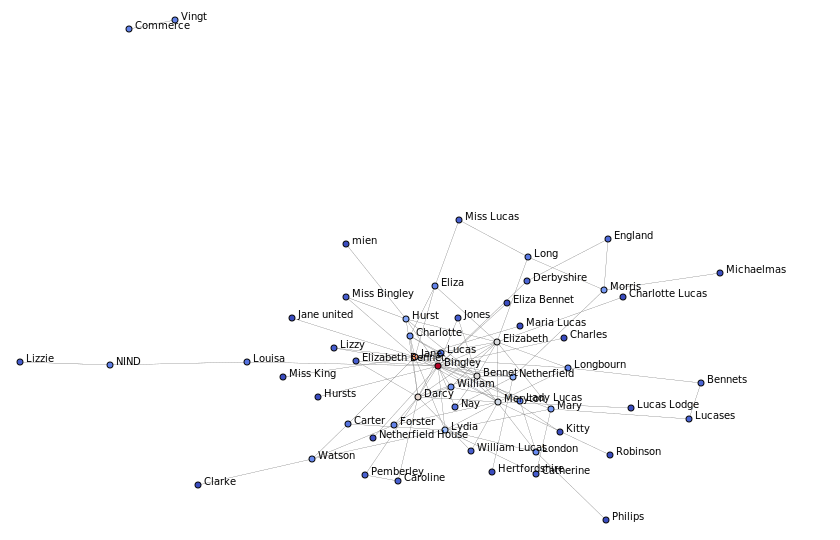

In [59]:
draw_graph(G_sh1, edge_width=0.2, node_size=3, show_names=True, save_path="PaP_graph.png")

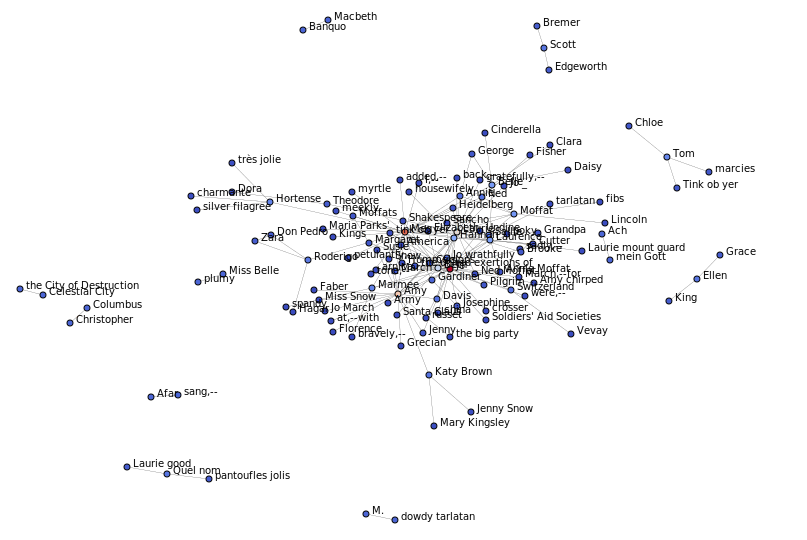

In [60]:
draw_graph(G_sh2, edge_width=0.2, node_size=3, show_names=True, save_path="LW_graph.png")

## Requisito 4
Análise da Rede
- Calcular métricas como grau, centralidade e densidade.
- Identificar padrões e características, como clusters, hubs ou comunidades relevantes.
- Incorporar visualizações intermediárias (ego network, k-core, etc) para análise qualitativa.

In [61]:
def draw_ego_graph(G, ego, center=True, k=0, show_names=True, edge_width=0.1, node_size=3, font_size=12, save_path=False):

    ego = nx.ego_graph(G, ego, center=center)

    ego = nx.k_core(ego, k)

    # Adiciona o salvamento do grafo como PNG com ajustes na distância dos nós
    if save_path:
        plt.figure(figsize=(10, 10))  # Ajuste do tamanho da figura

        # Calcula a posição dos nós com maior espaçamento
        pos = nx.spring_layout(G, k=0.5)  # Ajuste o valor de 'k' para controlar a distância (padrão é 0.1)

        nx.draw(
            G, pos=pos, with_labels=show_names, node_color="skyblue", node_size=20,
            font_size=font_size, width=edge_width, font_color="gray"  # Define a cor do texto como cinza
        )
        plt.savefig(save_path, format="PNG", transparent=True)  # Salva o grafo como PNG com fundo transparente
        plt.close()  # Fecha a figura para liberar memória

    return draw_graph(ego, node_size=node_size, font_size=font_size, show_names=show_names, edge_width=edge_width)

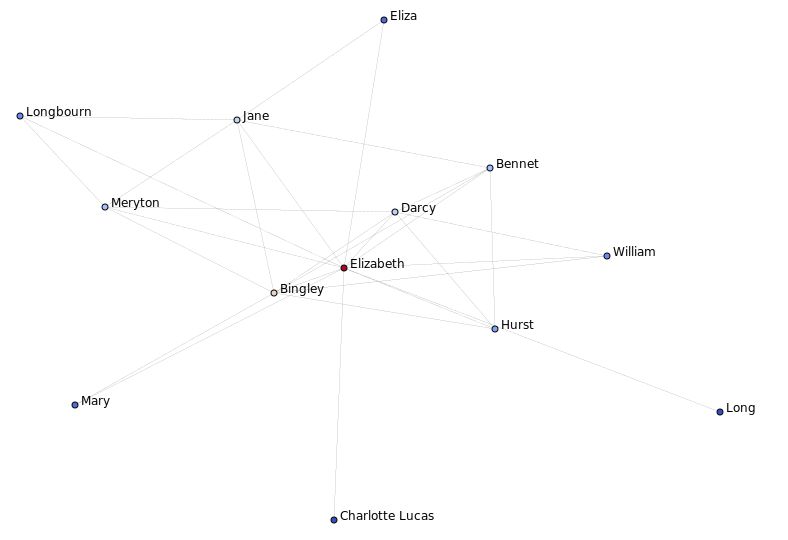

In [62]:
draw_ego_graph(G_sh1, 'Elizabeth', save_path="PaP_graph_elizab.png")

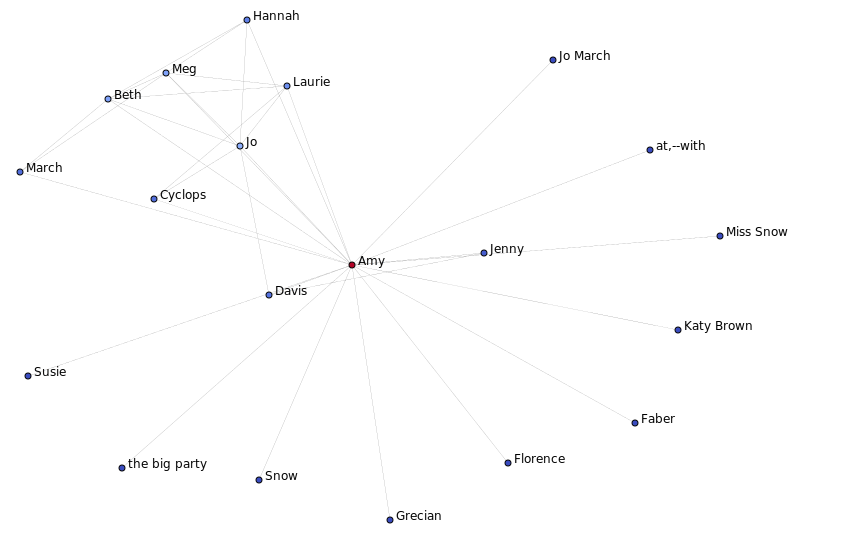

In [63]:
draw_ego_graph(G_sh2, 'Amy', save_path="LW_graph_amy.png")

## Requisito 5
Visualização e Produção do Grafo:
- Utilizar NetworkX, Gephi para criar uma visualização
interativa.
- Colocar o grafo em produção e disponibilizá-lo online, seguindo os métodos apresentados em sala.

In [32]:
nx.write_graphml(G_sh1, "PaP.graphml")
nx.write_graphml(G_sh2, "LW.graphml")